In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [288]:
import numpy as np
import luminosity_analytic as l
import luminosity_numerical_no_SG as ln
from utils.constants import G, kb, mp, Rb, Me, Re, Msun, RH, RHe, sigma, \
    cmperau, RHill, gammafn, mufn, Rfn, Cvfn, kdust, Tdisk, Pdisk, params, yr, kconst, kdustall
from utils.parameters import FT, FSigma, mstar, Y, delad, rhoc, Mc, rc, \
    gamma, Y, a
import atmseries as atm
import cooling as cool
from scipy.interpolate import interp1d
    
reload(l)
reload(ln)
reload(atm)
reload(cool)

<module 'cooling' from 'cooling.py'>

In [4]:
delad = 2./7
a = 0.1
Mc = 10 * Me
rc = (3*Mc/(4*np.pi*rhoc))**(1./3)            
    
A = 5 * np.pi / 16
mu = 2.35 * mp
gammac = 4./3
muc = 60 * mp

            
prms = params(Mc, rc, a, delad, Y, gamma = gammafn(delad), R = Rfn(Y), \
    Cv = Cvfn(Y, delad), Pd = Pdisk(a, mstar, FSigma, FT), \
    Td = 1e3, kappa = kconst)

In [41]:
t, L = l.Lglobal(l.prms, 1e3*yr, 3e6*yr, 500)

In [14]:
model, param, prof = atm.atmload('a01Mc10', prms)

In [15]:
M = []
for i in range(len(t)):
    M = np.append(M, l.Matm(t[i], l.RBp(l.prms), l.prms))

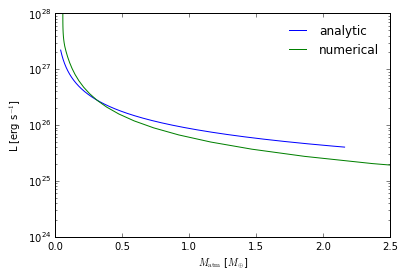

In [47]:
plt.semilogy(M / Me, L, label = 'analytic')
plt.semilogy(param.Mtot - model.Mco / Me, param.L, label = 'numerical')
plt.xlim(xmax = 2.5)
plt.xlabel(r'$M_{\rm atm}$ [$M_{\oplus}$]')
plt.ylabel(r'L [erg s$^{-1}$]')
plt.legend(frameon = False)

plt.savefig('../figs/comp_L_vs_M.pdf')

In [42]:
dt = cool.cooling_global(param, prof, model, out='rout')[0]

time = []
for i in range(len(dt)):
    time = np.append(time, sum(dt[:i + 1]))

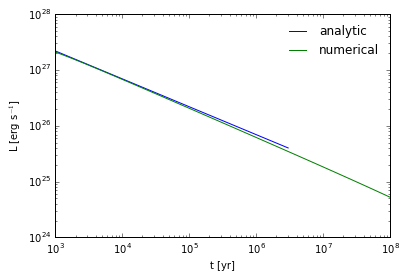

In [48]:
plt.loglog(t / yr, L, label = 'analytic')
plt.loglog(time / yr, param.L[:-1], label = 'numerical')
plt.xlim(xmin = 1e3, xmax = 1e8)
plt.legend(frameon = False)
plt.xlabel('t [yr]')
plt.ylabel(r'L [erg s$^{-1}$]')

plt.savefig('../figs/comp_L_vs_t.pdf')

In [275]:
prms2 = params(Mc, rc, a, delad, Y, gamma = gammafn(delad), R = Rfn(Y), \
    Cv = Cvfn(Y, delad), Pd = Pdisk(a, mstar, FSigma, FT), \
    Td = 1e3, kappa = kdustall)

model2, param2, prof2 = atm.atmload('a01Mc10', prms2)

In [93]:
prms3 = params(Mc, rc, 5.0, delad, Y, gamma = gammafn(delad), R = Rfn(Y), \
    Cv = Cvfn(Y, delad), Pd = Pdisk(a, mstar, FSigma, FT), \
    Td = 60., kappa = kdust)

model3, param3, prof3 = atm.atmload('a5Mc10', prms3)

In [330]:
c2 = cool.cooling_global(param2, prof2, model2, out = 'rout')

In [305]:
c3 = cool.cooling_global(param3, prof3, model3, out = 'rcb')

In [306]:
c1 = cool.cooling_global(param, prof, model, out='rout')

In [307]:
cneg1 = cool.cooling_local(param, prof, model, out='rout', onlyrad = 1)

In [323]:
cneg2 = cool.cooling_local(param2, prof2, model2, out='rcb', onlyrad = 1)

In [327]:
cneg2 / (param2.Etotcb[1:]-param2.Etotcb[:-1])

array([-0.        ,  0.00607667,  0.00757521,  0.00776504,  0.00843903,
        0.00854647,  0.00910212,  0.00920997,  0.00929746,  0.0093596 ,
        0.0093959 ,  0.00982745,  0.00959544,  0.00996775,  0.00973924,
        0.01005167,  0.01020935,  0.01036984,  0.01052972,  0.0106854 ,
        0.01083411,  0.01097314,  0.01110065,  0.01121453,  0.01131374,
        0.01180708,  0.01201752,  0.01207348,  0.01254728,  0.01277831,
        0.0132385 ,  0.01911046,  0.02296826,  0.02527675,  0.02821   ,
        0.03170923,  0.03602438,  0.04125276,  0.04759156,  0.05666697,
        0.06631885,  0.07793089,  0.09189896,  0.10493746,  0.12168   ,
        0.10706784,  0.09342889,  0.08081821,  0.07115384])

In [331]:
dt2 = c2[0]
time2 = []
for i in range(len(dt2)):
    time2 = np.append(time2, sum(dt2[:i + 1]))

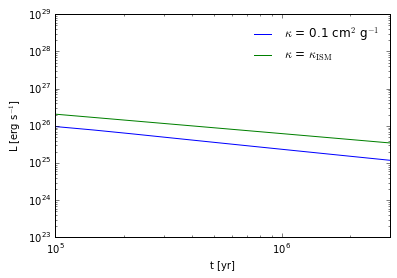

In [311]:
plt.loglog(time2 / yr, param2.L[:-1], label = r'$\kappa$ = 0.1 cm$^2$ g$^{-1}$')
plt.loglog(time / yr, param.L[:-1], label = r'$\kappa$ = $\kappa_{\rm ISM}$')
plt.xlim(xmin = 1e5, xmax = 3e6)
plt.legend(frameon = False)
plt.xlabel('t [yr]')
plt.ylabel(r'L [erg s$^{-1}$]')

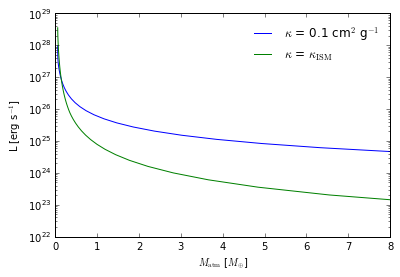

In [314]:
plt.semilogy(param.Mtot - model.Mco / Me, param.L, label = r'$\kappa$ = 0.1 cm$^2$ g$^{-1}$')
plt.semilogy(param2.Mtot - model2.Mco / Me, param2.L, label = r'$\kappa$ = $\kappa_{\rm ISM}$')
plt.xlim(xmax = 8)
plt.xlabel(r'$M_{\rm atm}$ [$M_{\oplus}$]')
plt.ylabel(r'L [erg s$^{-1}$]')
plt.legend(frameon = False)

#plt.savefig('../figs/comp_L_vs_M.pdf')

In [181]:
prmsPd10 = params(Mc, rc, 0.1, delad, Y, gamma = gammafn(delad), R = Rfn(Y), \
    Cv = Cvfn(Y, delad), Pd = Pdisk(a, mstar, FSigma, FT) * 1e-10, \
    Td = 1e3, kappa = kdust)

modelPd10, paramPd10, profPd10 = atm.atmload('a01Mc10Pd10', prmsPd10)
cPd10 = cool.cooling_global(paramPd10, profPd10, modelPd10, out = 'rout')

dtPd10 = cPd10[0]
timePd10 = []
for i in range(len(dtPd10)):
    timePd10 = np.append(timePd10, sum(dtPd10[:i + 1]))

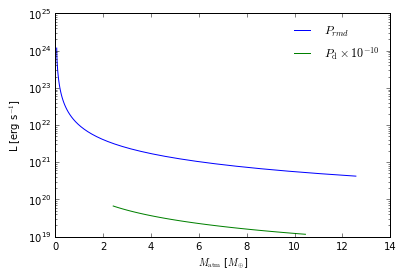

In [183]:
plt.semilogy(param2.Mtot - model2.Mco / Me, param2.L, label = r'$P_{rm d}$')
plt.semilogy(paramPd10.Mtot - modelPd10.Mco / Me, paramPd10.L, \
             label = r'$P_{\rm d} \times 10^{-10}$')
plt.xlabel(r'$M_{\rm atm}$ [$M_{\oplus}$]')
plt.ylabel(r'L [erg s$^{-1}$]')
plt.legend(frameon = False)

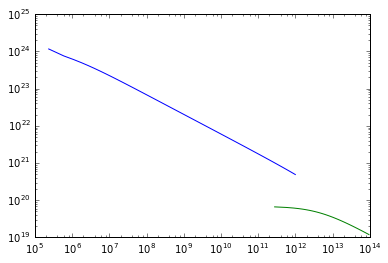

In [184]:
plt.loglog(time2 / yr, param2.L[:-1])
plt.loglog(timePd10 / yr, paramPd10.L[:-1])

In [340]:
sum(cool.cooling_global(param2, prof2, model2, out = 'rcb')[0][:-4])/yr/1e6

40.196910519647531

In [344]:
time2[-5]/1e6/yr

168.59083802521778

In [302]:
time2[-1]/yr/1e6

4796.3367417876516

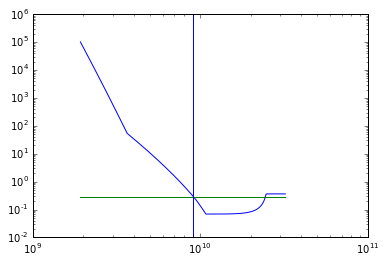

In [286]:
plt.loglog(prof2.r[20], prof2.delrad[30])
plt.loglog(prof2.r[20], np.ones(500) * 2./7)
plt.axvline(x = param2.rcb[30] * Re)

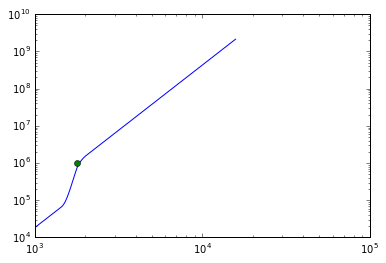

In [247]:
plt.loglog(prof2.t[20], prof2.P[20])
plt.plot(param2.Tcb[20], param2.Pcb[20], 'o')

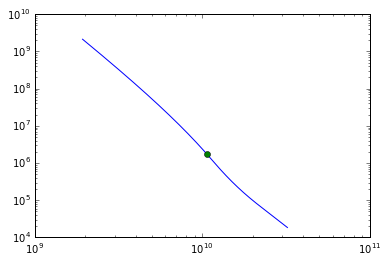

In [283]:
plt.loglog(prof2.r[20], prof2.P[20])
plt.plot(param2.rcb[20]*Re, param2.Pcb[20], 'o')

In [379]:
f = interp1d(time2 / yr, param2.Mtot[1:])
f(3e6)

array(10.953008497249893)

In [386]:
print param2.Mtot[39], time2[39]/yr

10.9945836124 5873019.12003


In [401]:
print - G * model2.Mco * (param2.Mtot[39] * Me - model2.Mco) / (param2.rcb[39] * Re) + \
    model2.Cv * param2.Tcb[39] * param2.Mtot[39], param2.Etotout[39]

[ -2.95634208e+39] -2.6674960955e+39


In [398]:
f = interp1d(time / yr, param.Mtot[1:])
f(3e6)
print param.Mtot[42], time[42]/yr

11.8609049275 4687685.73493


In [402]:
print - G * model.Mco * (param.Mtot[42] * Me - model.Mco) / (param.rcb[42] * Re) + \
    model.Cv * param.Tcb[42] * param.Mtot[42], param.Etotout[42]

[ -1.37460759e+39] -5.48028950584e+39


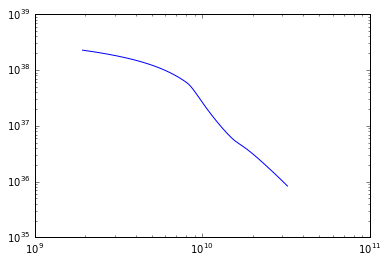

In [389]:
plt.loglog(prof2.r[39], - (- G * prof2.m[39] / prof2.r[39] + model2.Cv * prof2.t[39]) * \
           prof2.rho[39] * prof2.r[39]**3)